In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['escape' 'bounds' 'probably' 'exchange' 'shirts' 'sensual' 'louis'
 'travel' 'sort' 'nassau' 'realize' 'individual' 'playwriting' 'boom'
 'saul' 'arranged' 'hours' 'driven' 'realm' 'institutions']


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [9]:

fst = pca.components_[0]

fst_names = list(zip(fst, data.columns.values))
print(len(fst_names))

fst_max_15 = sorted(fst_names, key=lambda x: x[0], reverse=True)[:15]

fst_max_15

4424


[(0.26127391890531587, 'she'),
 (0.24529311441720675, 'her'),
 (0.20211292705699738, 'ms'),
 (0.15028278883843357, 'i'),
 (0.13360556763625311, 'said'),
 (0.10687219119361743, 'mother'),
 (0.10300939205022899, 'cooper'),
 (0.09432521211958252, 'my'),
 (0.08788709841748935, 'painting'),
 (0.07119630147343924, 'process'),
 (0.06988483529500195, 'paintings'),
 (0.06857385461154239, 'im'),
 (0.06562096808145768, 'mrs'),
 (0.06531001248089248, 'he'),
 (0.06379278250161478, 'me')]

In [11]:
fst_min_15 = sorted(fst_names, key=lambda x: x[0])[:15]

fst_min_15

[(-0.11211617341838434, 'music'),
 (-0.0878073164338167, 'trio'),
 (-0.07404600988801385, 'theater'),
 (-0.06926899826753337, 'orchestra'),
 (-0.058590609670586435, 'composers'),
 (-0.055553640967300894, 'opera'),
 (-0.05117796156989034, 'theaters'),
 (-0.04902545227080579, 'm'),
 (-0.049001383290293785, 'program'),
 (-0.048818826144997315, 'players'),
 (-0.04812333139017815, 'festival'),
 (-0.04794086893749094, 'east'),
 (-0.04791174835954268, 'y'),
 (-0.04603235412282292, 'jersey'),
 (-0.04493077625468051, 'symphony')]

In [12]:
snd = pca.components_[1]

snd_names = list(zip(snd, data.columns.values))

snd_max_15 = sorted(snd_names, key=lambda x: x[0], reverse=True)[:15]

snd_max_15

[(0.22078475821587348, 'her'),
 (0.21307376342525283, 'she'),
 (0.1623905985100136, 'theater'),
 (0.1299263753545694, 'opera'),
 (0.12447032686713268, 'ms'),
 (0.08120155281056647, 'i'),
 (0.08075865381307722, 'hour'),
 (0.07465343667556089, 'sang'),
 (0.07415772534187783, 'production'),
 (0.07300940791699438, 'festival'),
 (0.07234461523901559, 'music'),
 (0.07070817873039478, 'musical'),
 (0.06923167953630353, 'songs'),
 (0.06760285785600799, 'orchestra'),
 (0.06758794058200351, 'vocal')]

In [14]:
snd_min_15 = sorted(snd_names, key=lambda x: x[0])[:15]

snd_min_15

[(-0.15431673143840435, 'art'),
 (-0.12089946277617691, 'museum'),
 (-0.09522680440744602, 'images'),
 (-0.09263497758879576, 'artists'),
 (-0.07765780277980369, 'donations'),
 (-0.07539497668344301, 'museums'),
 (-0.07401963974238235, 'painting'),
 (-0.07226860058901613, 'tax'),
 (-0.06564345120814832, 'paintings'),
 (-0.060353138718405516, 'sculpture'),
 (-0.05515928883067876, 'gallery'),
 (-0.051479139293811205, 'sculptures'),
 (-0.050138313462929025, 'painted'),
 (-0.04966737533217039, 'white'),
 (-0.04666421975711604, 'service')]

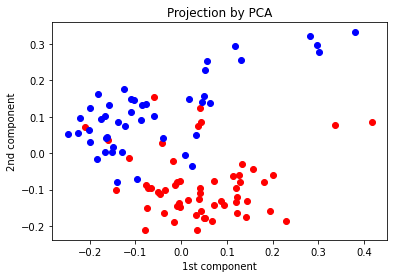

In [19]:
import matplotlib.pyplot as plt

reds = df.loc[df['class.labels'] == 'art'].index
blues = df.loc[df['class.labels'] == 'music'].index

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

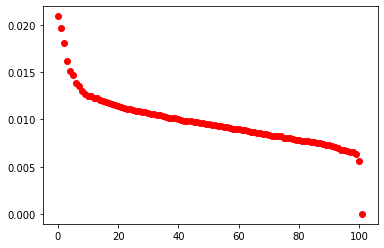

0.15773478029003496


In [20]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))